In [1]:
import pandas as pd
import joblib
import pickle

from lightgbm import LGBMClassifier
import lightgbm as lgb

import matplotlib.pyplot as plt

In [2]:
# load the model
model = joblib.load('model/best_LGB_10k_Undersampled_BestParams.pkl')
#load the X_train dataframe
df = pd.read_pickle('../data/cleaned/client_data_api_dashboard_1k.pkl')

In [3]:
import shap

# FEATURE IMPORTANCES 'MANUAL'

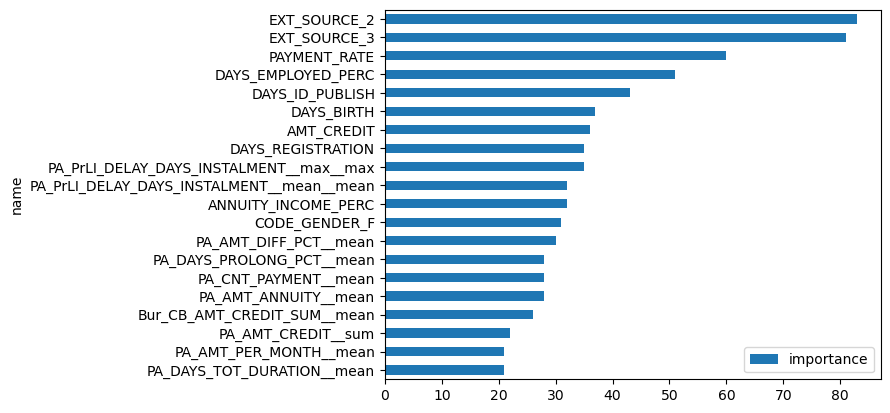

In [4]:
features = pd.DataFrame(columns=['name','importance'])
importance = model.feature_importances_
for i,v in enumerate(importance):
    feature_name = model.feature_name_[i]
    features.loc[len(features.index)] = [feature_name,v] 
features = features.sort_values('importance', ascending=False).head(20).set_index('name')
graph = features.sort_values('importance').plot.barh()


# SHAP

In [5]:
X = df.drop(columns=['TARGET'])

In [6]:
# load JS visualization code to notebook
shap.initjs()

In [7]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:])


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


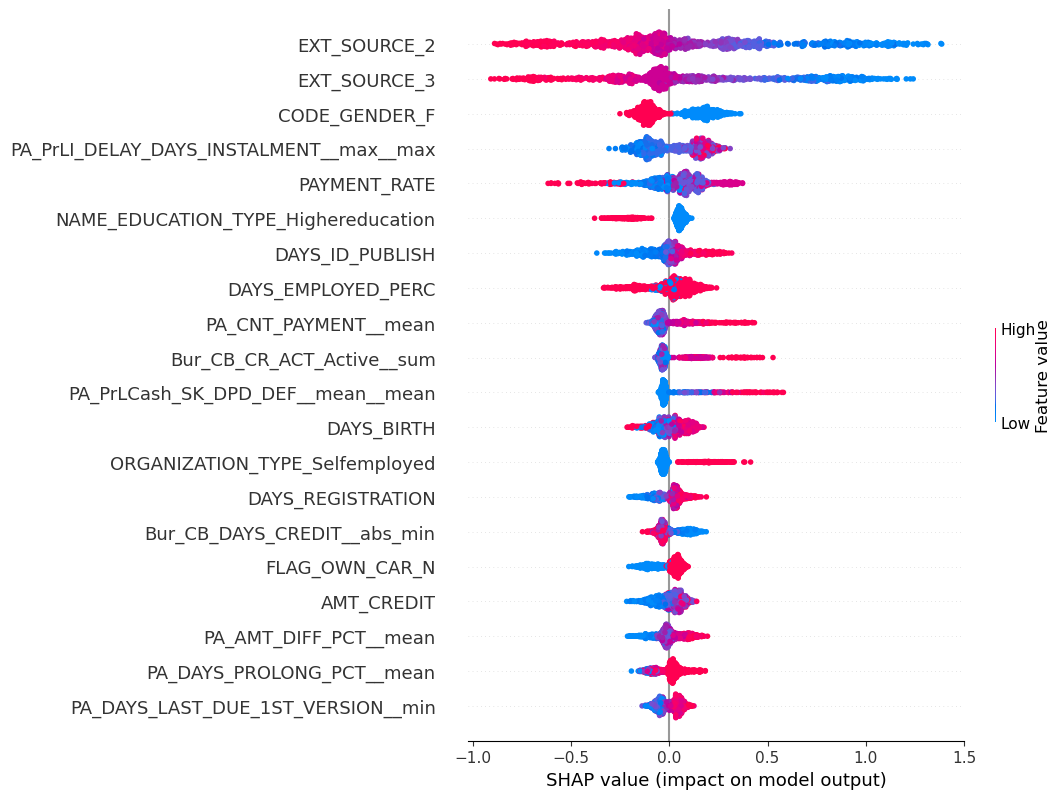

In [8]:
shap.summary_plot(shap_values[1], X, show = False)

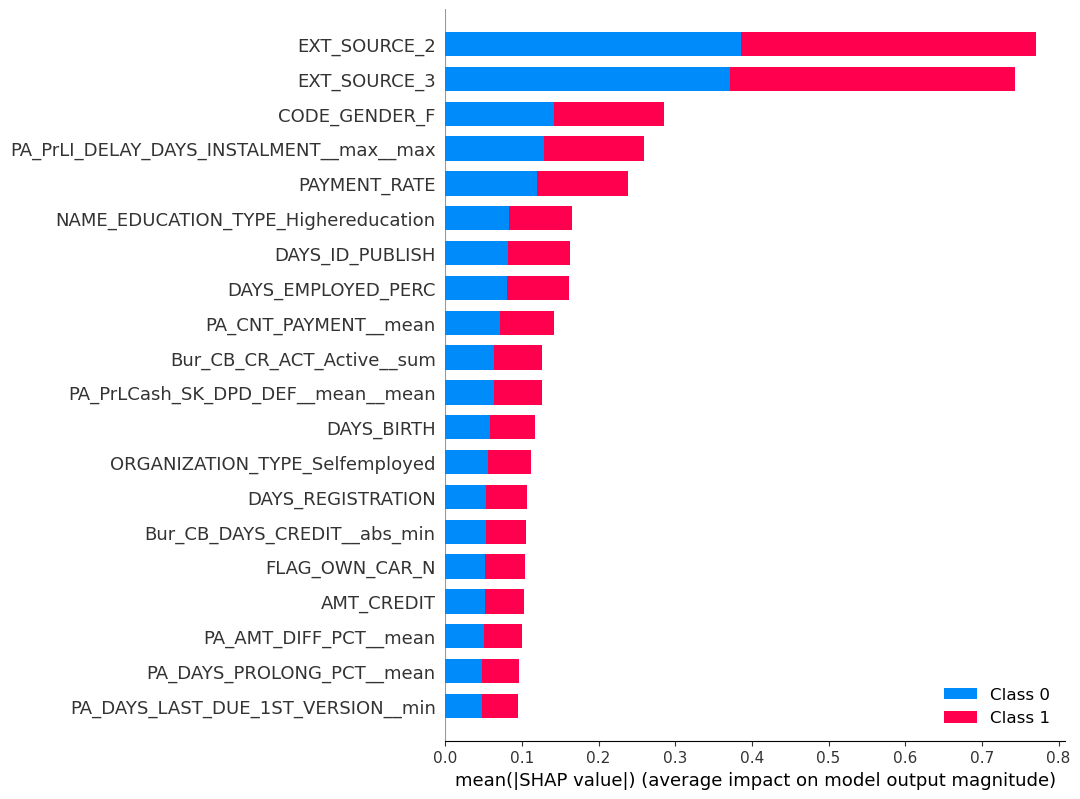

In [9]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

In [13]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:100,:], X.iloc[:100,:]) #100 ROWS